In [1]:
import networkx as nx 
import pandas as pd 

In [2]:
n = 500 # number of nodes
m = 3 # number of edges added to each new node

G = nx.barabasi_albert_graph(n, m)

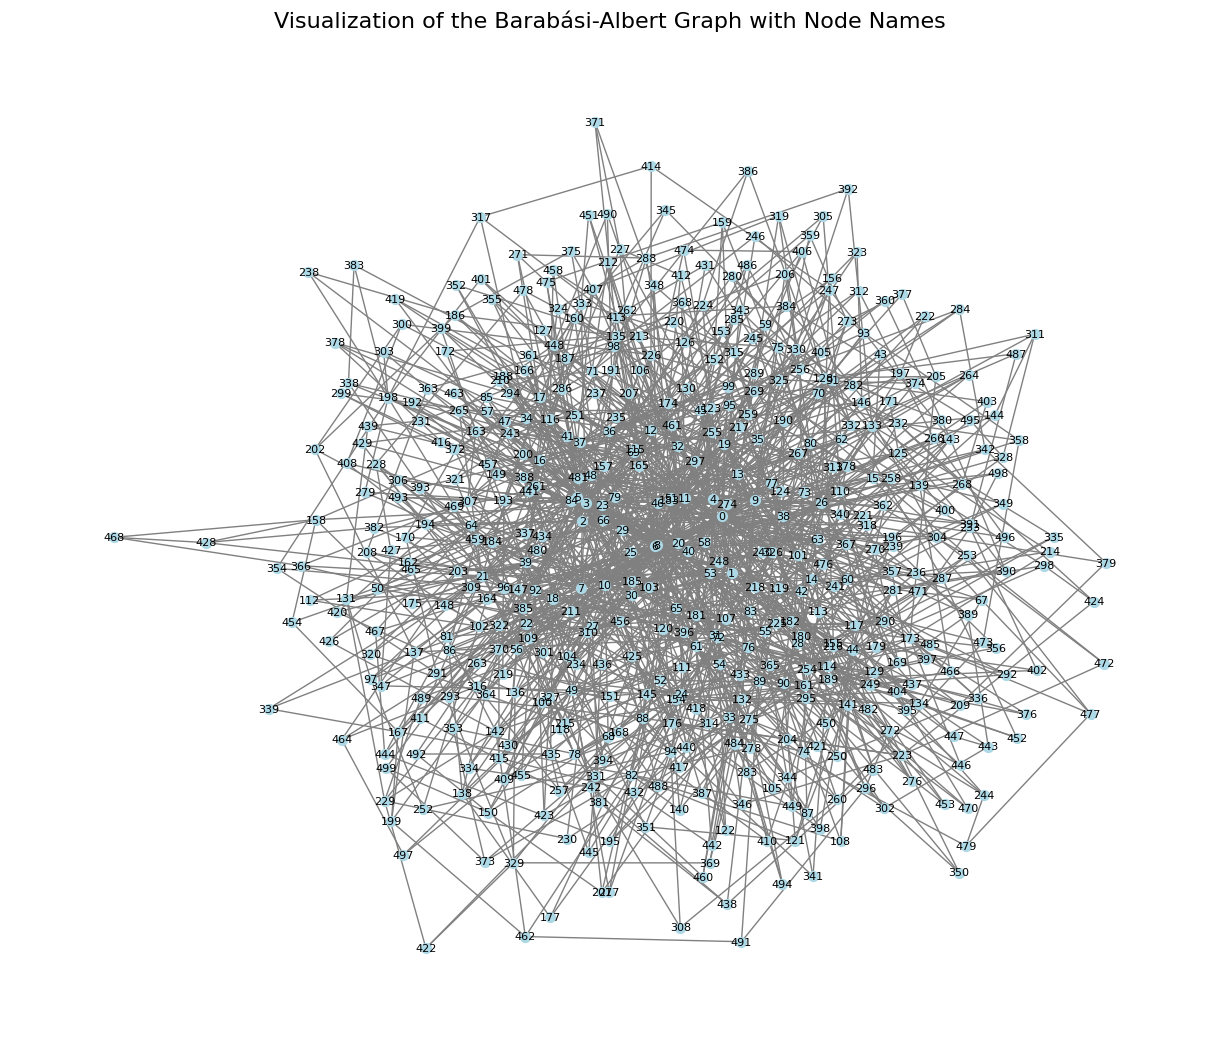

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  

nx.draw(
    G, pos, node_size=50, node_color="lightblue", edge_color="gray", with_labels=False
)

labels = {node: str(node) for node in G.nodes()}  
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black")

plt.title("Visualization of the Barabási-Albert Graph with Node Names", fontsize=16)
plt.show()

In [6]:
# Initializing Node States

import random 

for node in G.nodes():
    G.nodes[node]['state'] = 'S'
initial_infected = random.sample(list(G.nodes()), 5)
for node in initial_infected:
    G.nodes[node]['state'] = 'I'



In [7]:
beta = 0.03  # Transmission rate
gamma = 0.01  # Recovery rate


In [8]:
def simulate_SIR(G, beta, gamma, max_iterations=100):
    time_series = {'S': [], 'I': [], 'R': []}
    for _ in range(max_iterations):
        new_states = {}
        for node in G.nodes():
            state = G.nodes[node]['state']
            if state == 'I':
                # Transmission to neighbors
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['state'] == 'S':
                        if random.random() < beta:
                            new_states[neighbor] = 'I'
                # Recovery
                if random.random() < gamma:
                    new_states[node] = 'R'
        # Update states
        for node, state in new_states.items():
            G.nodes[node]['state'] = state
        # Count states
        S_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 'S')
        I_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 'I')
        R_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 'R')
        time_series['S'].append(S_count)
        time_series['I'].append(I_count)
        time_series['R'].append(R_count)
        if I_count == 0:
            break  # Epidemic ends
    return time_series


In [9]:
results = simulate_SIR(G, beta, gamma)


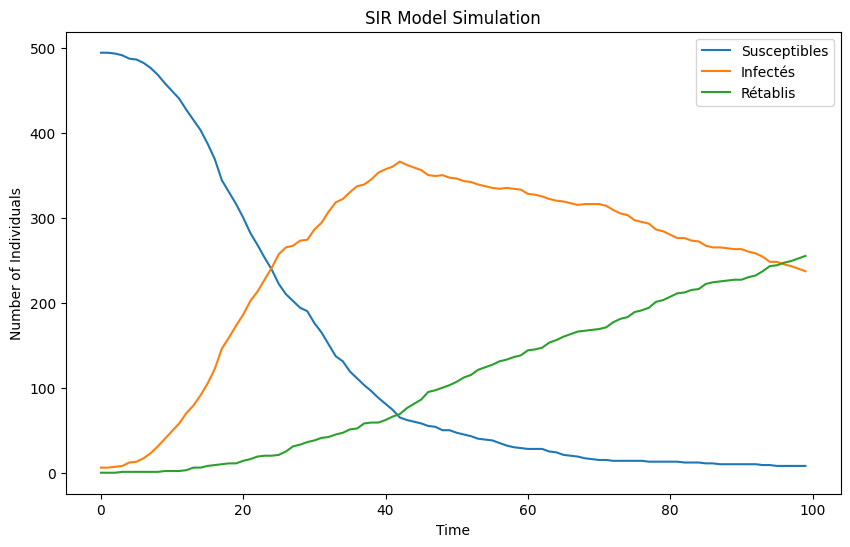

In [10]:
plt.figure(figsize=(10,6))
plt.plot(results['S'], label='Susceptibles')
plt.plot(results['I'], label='Infectés')
plt.plot(results['R'], label='Rétablis')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Simulation')
plt.legend()
plt.show()


In [11]:
# Infect a few random nodes initially
initial_infected = random.sample(list(G.nodes()), 5)
for node in initial_infected:
    G.nodes[node]['state'] = 'I'

In [12]:
# Function to simulate the SIS model
def simulate_SIS(G, beta, gamma, max_iterations):
    time_series = {'S': [], 'I': []}
    
    for _ in range(max_iterations):
        new_states = {}
        for node in G.nodes():
            state = G.nodes[node]['state']
            
            if state == 'S':  # Susceptible nodes
                # Check for infection from neighbors
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['state'] == 'I' and random.random() < beta:
                        new_states[node] = 'I'
                        break
            elif state == 'I':  # Infected nodes
                # Recover with probability gamma
                if random.random() < gamma:
                    new_states[node] = 'S'
        
        # Update states
        for node, state in new_states.items():
            G.nodes[node]['state'] = state
        
        # Count the number of susceptible and infected nodes
        S_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 'S')
        I_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 'I')
        
        time_series['S'].append(S_count)
        time_series['I'].append(I_count)
    
    return time_series

max_iterations = 100 
# Simulate the SIS model
results = simulate_SIS(G, beta, gamma, max_iterations)



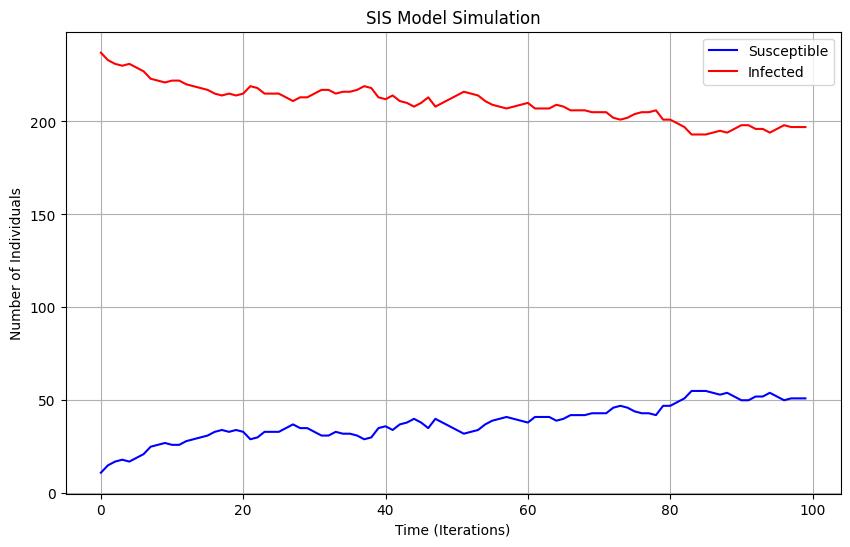

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results['S'], label='Susceptible', color='blue')
plt.plot(results['I'], label='Infected', color='red')
plt.xlabel('Time (Iterations)')
plt.ylabel('Number of Individuals')
plt.title('SIS Model Simulation')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Initialize all nodes as susceptible
for node in G.nodes():
    G.nodes[node]['state'] = 'S'

# Infect a few random nodes initially
initial_infected = random.sample(list(G.nodes()), 5)
for node in initial_infected:
    G.nodes[node]['state'] = 'I'

In [15]:
# Function to simulate the SI model
def simulate_SI(G, beta, max_iterations):
    time_series = {'S': [], 'I': []}
    
    for _ in range(max_iterations):
        new_states = {}
        for node in G.nodes():
            state = G.nodes[node]['state']
            
            if state == 'S':  # Susceptible nodes
                # Check for infection from neighbors
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['state'] == 'I' and random.random() < beta:
                        new_states[node] = 'I'
                        break
        
        # Update states
        for node, state in new_states.items():
            G.nodes[node]['state'] = state
        
        # Count the number of susceptible and infected nodes
        S_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 'S')
        I_count = sum(1 for node in G.nodes() if G.nodes[node]['state'] == 'I')
        
        time_series['S'].append(S_count)
        time_series['I'].append(I_count)
    
    return time_series

# Simulate the SI model
results = simulate_SI(G, beta, max_iterations)

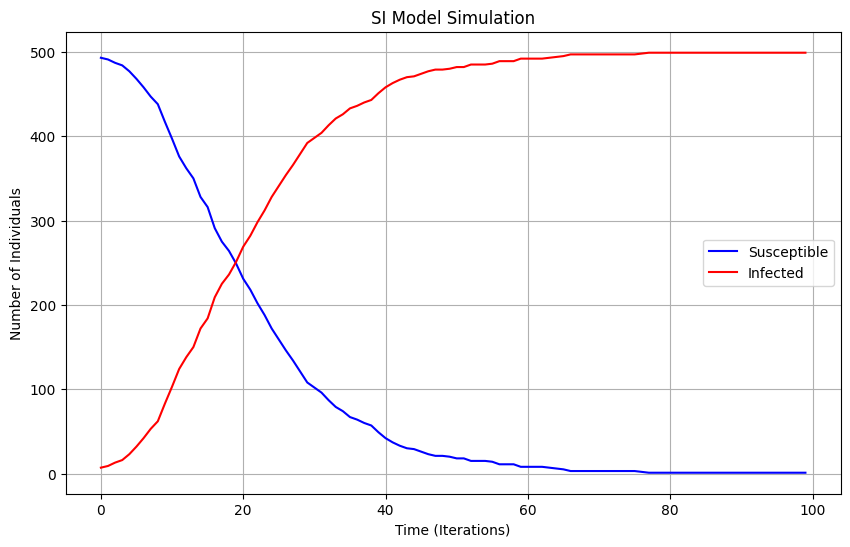

In [16]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results['S'], label='Susceptible', color='blue')
plt.plot(results['I'], label='Infected', color='red')
plt.xlabel('Time (Iterations)')
plt.ylabel('Number of Individuals')
plt.title('SI Model Simulation')
plt.legend()
plt.grid()
plt.show()

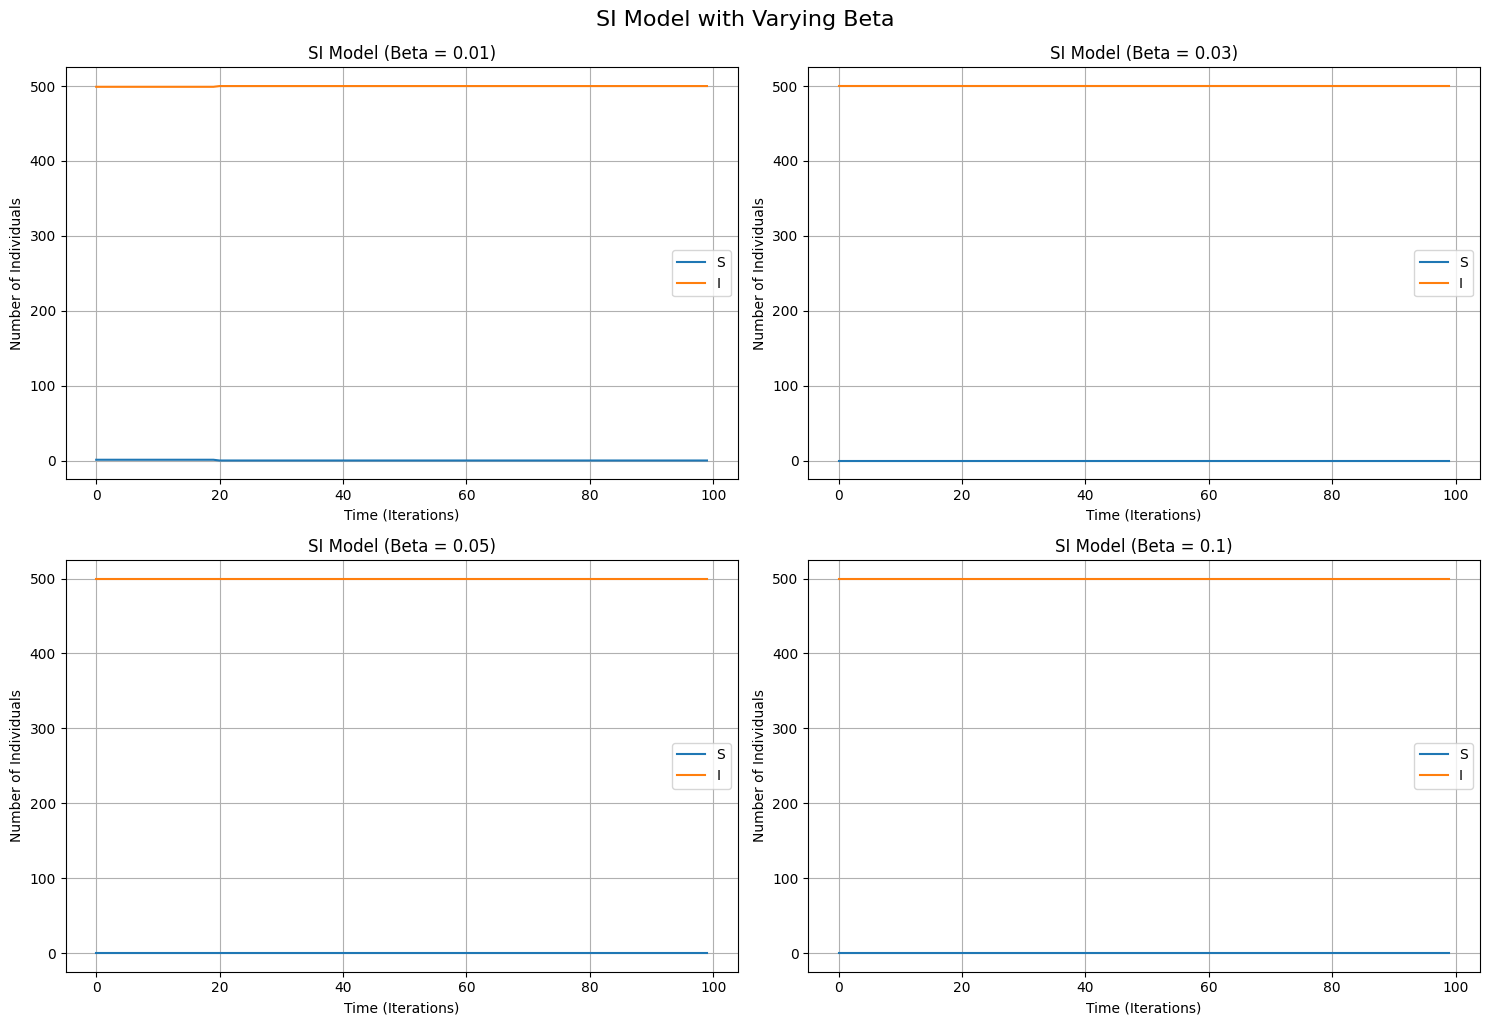

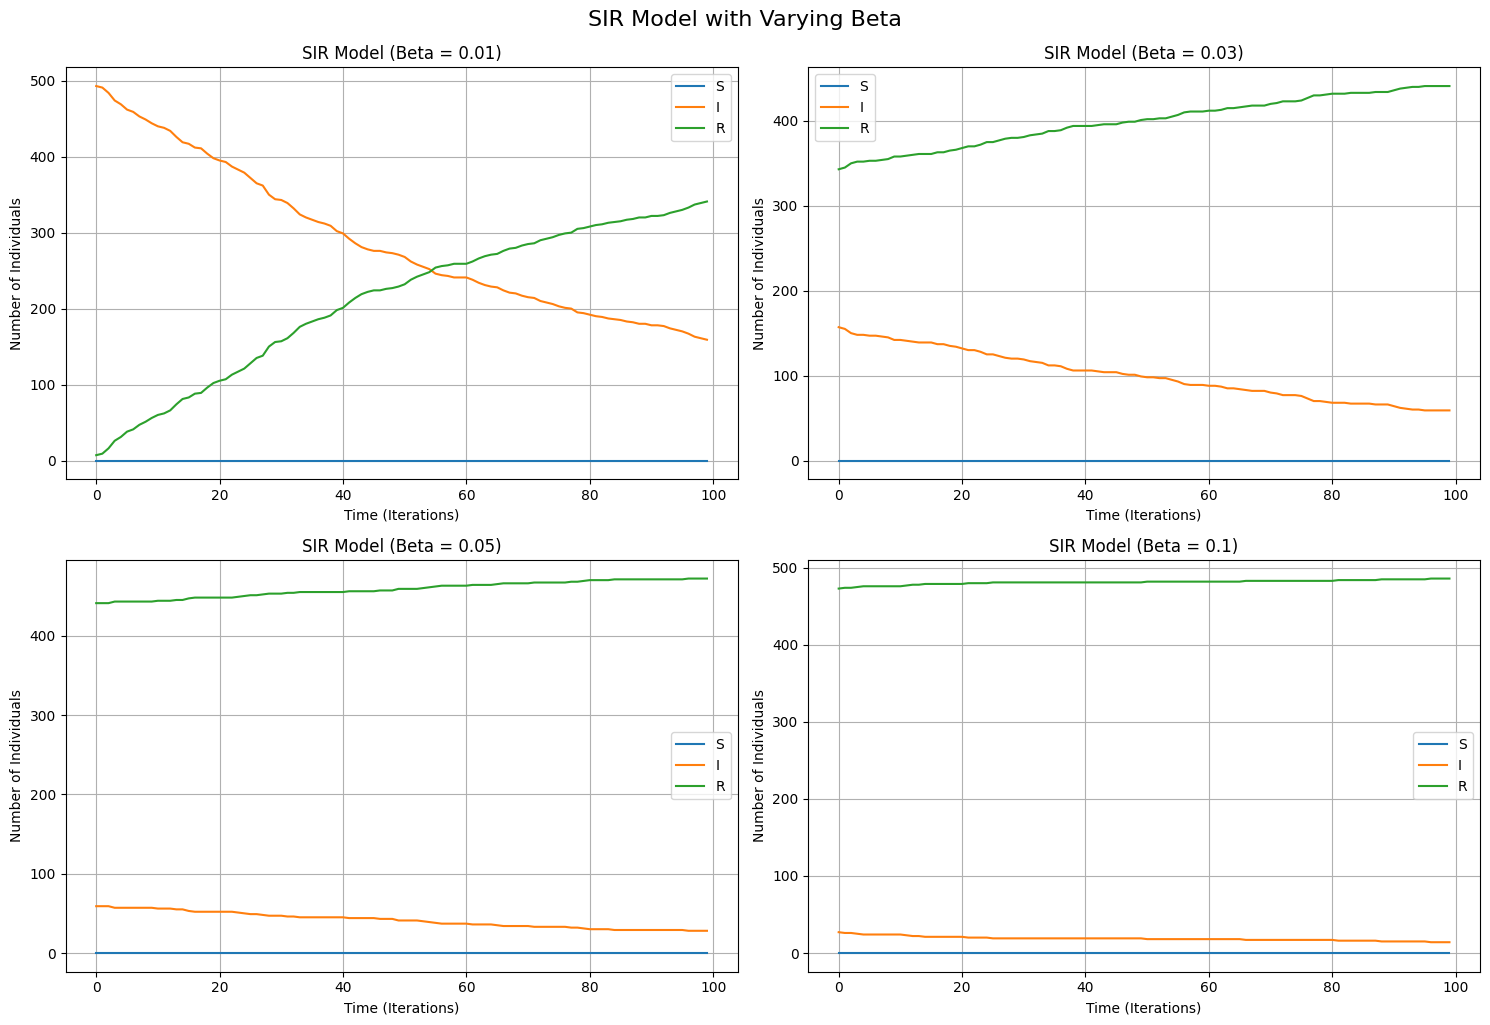

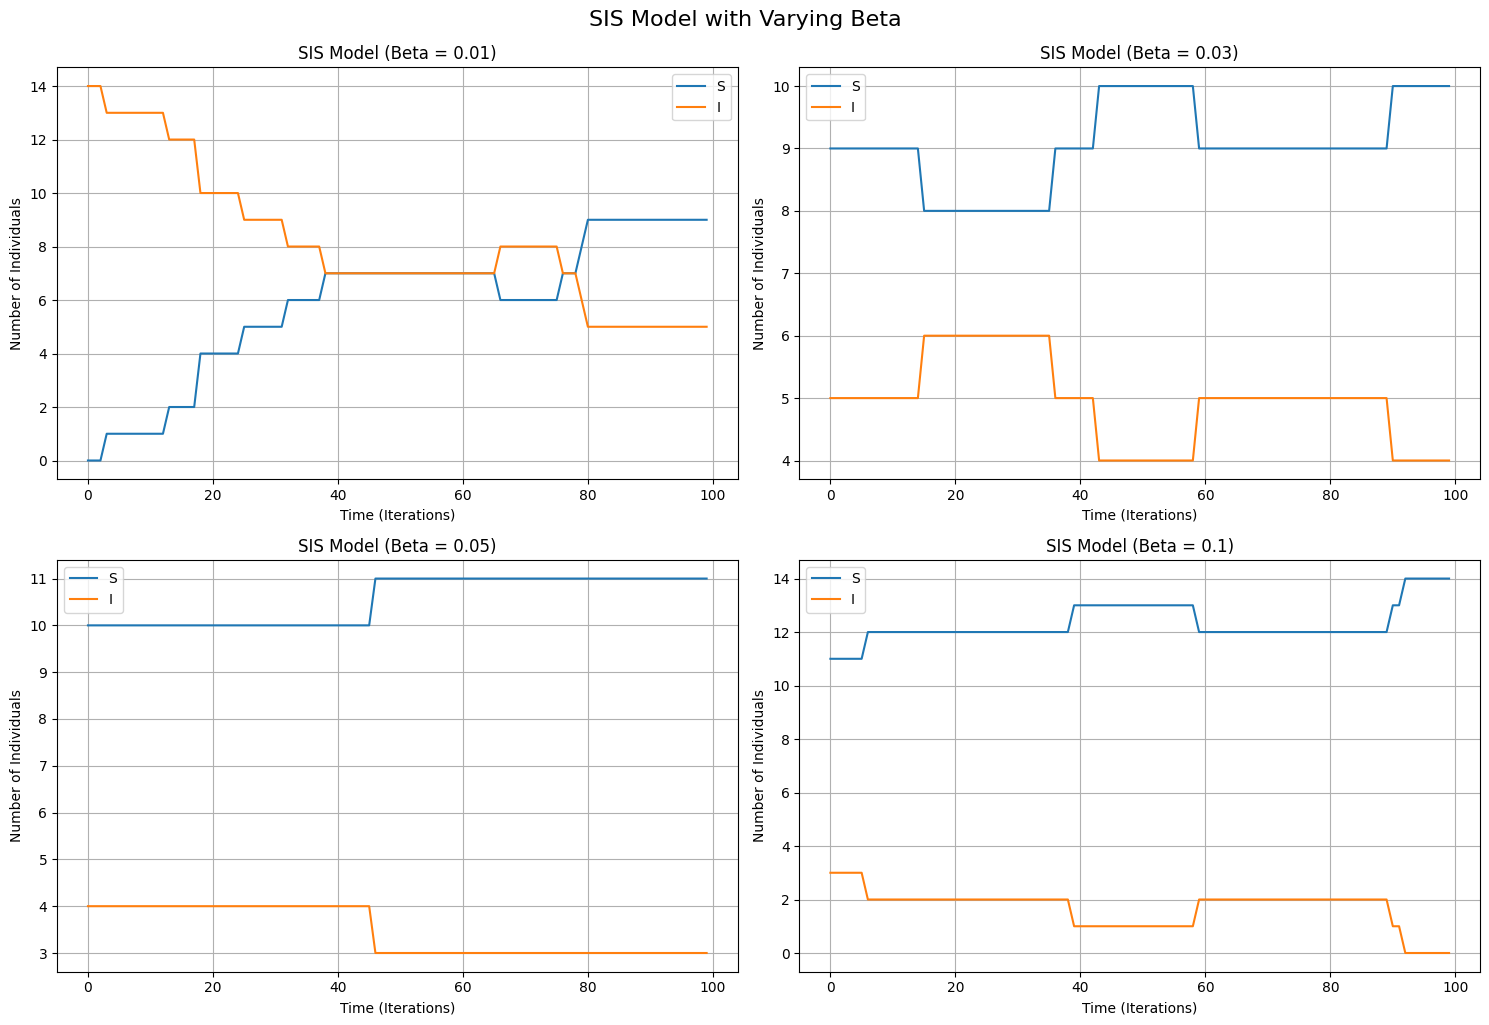

In [17]:
import matplotlib.pyplot as plt

# Define beta values to test
beta_values = [0.01, 0.03, 0.05, 0.1]

# Function to visualize a model with varying beta
def visualize_with_varying_beta(model_function, G, model_name, gamma=None, max_iterations=100):
    plt.figure(figsize=(15, 10))
    for i, beta in enumerate(beta_values):
        # Simulate the model
        if model_name == 'SIR' or model_name == 'SIS':
            results = model_function(G, beta, gamma, max_iterations)
        else:
            results = model_function(G, beta, max_iterations)
        
        # Plot results
        plt.subplot(2, 2, i + 1)
        for state, values in results.items():
            plt.plot(values, label=state)
        
        plt.title(f'{model_name} Model (Beta = {beta})')
        plt.xlabel('Time (Iterations)')
        plt.ylabel('Number of Individuals')
        plt.legend()
        plt.grid()
    
    plt.tight_layout()
    plt.suptitle(f'{model_name} Model with Varying Beta', y=1.02, fontsize=16)
    plt.show()

# Example usage for each model
gamma = 0.01  # Recovery rate for SIR and SIS
max_iterations = 100

# SI Model
visualize_with_varying_beta(simulate_SI, G, 'SI', max_iterations=max_iterations)

# SIR Model
visualize_with_varying_beta(simulate_SIR, G, 'SIR', gamma=gamma, max_iterations=max_iterations)

# SIS Model
visualize_with_varying_beta(simulate_SIS, G, 'SIS', gamma=gamma, max_iterations=max_iterations)


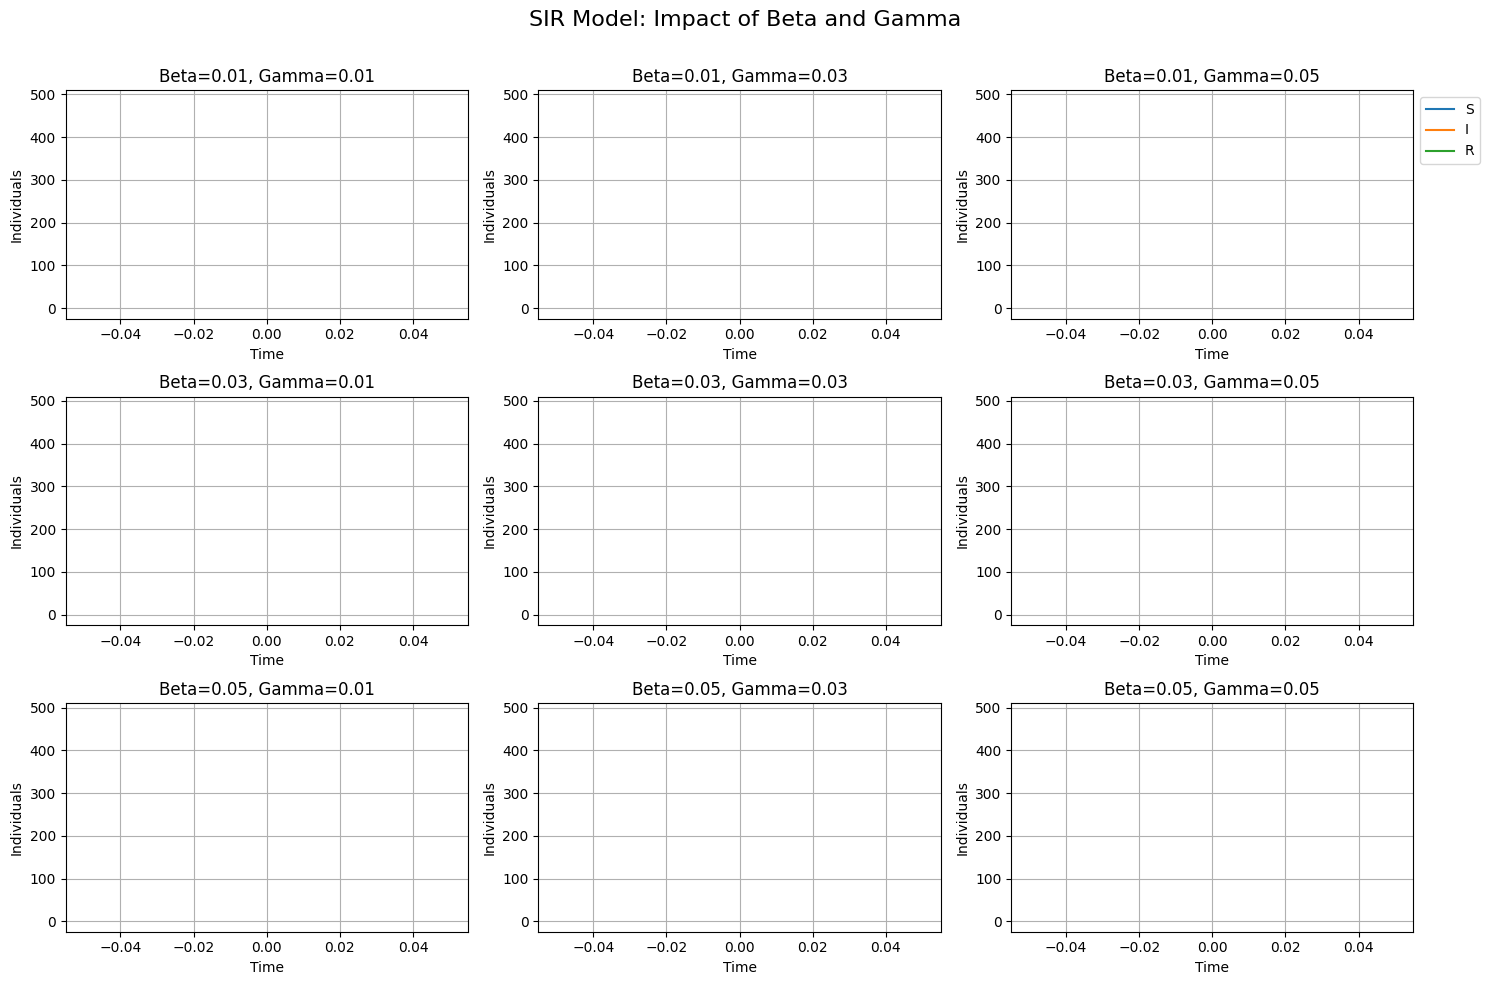

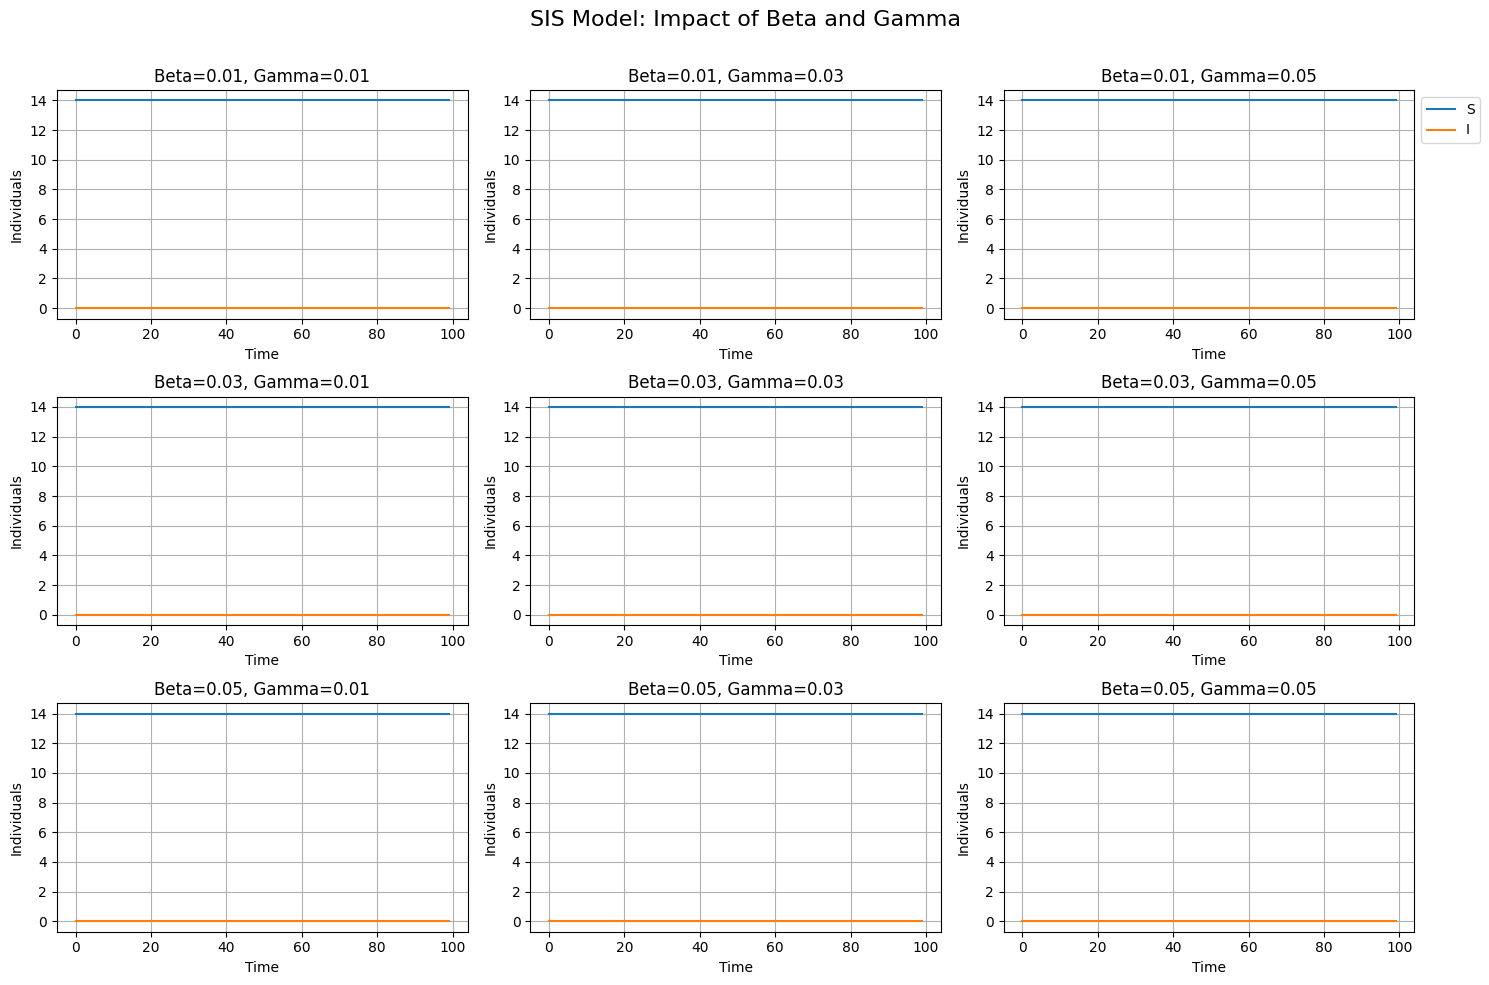

In [18]:
# Define beta and gamma values
beta_values = [0.01, 0.03, 0.05]
gamma_values = [0.01, 0.03, 0.05]

# Function to visualize model behavior for combinations of beta and gamma
def visualize_beta_gamma_combinations(model_function, G, model_name, max_iterations=100):
    fig, axes = plt.subplots(len(beta_values), len(gamma_values), figsize=(15, 10))
    fig.suptitle(f'{model_name} Model: Impact of Beta and Gamma', fontsize=16)
    
    for i, beta in enumerate(beta_values):
        for j, gamma in enumerate(gamma_values):
            # Simulate the model
            results = model_function(G, beta, gamma, max_iterations)
            
            # Plot results
            ax = axes[i, j]
            for state, values in results.items():
                ax.plot(values, label=state)
            
            ax.set_title(f'Beta={beta}, Gamma={gamma}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Individuals')
            ax.grid()
            if i == 0 and j == len(gamma_values) - 1:
                ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Example usage
max_iterations = 100

# SIR Model
visualize_beta_gamma_combinations(simulate_SIR, G, 'SIR', max_iterations=max_iterations)

# SIS Model
visualize_beta_gamma_combinations(simulate_SIS, G, 'SIS', max_iterations=max_iterations)